This is an unsupervised problem for which we will be using Clustering(KMeans).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
drivers_data = pd.read_csv("/Users/mahrukhwaqar/datascience/ML Models/driver_data.csv")

In [5]:
drivers_data.head()

,Distance_Feature,Speeding_Feature
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25


In [6]:
#we will do logical grouping to which driver is similar to other driver. 

In [7]:
#we have 2 features, the distance each driver covers and the speed with it covers

In [8]:
drivers_data.shape

(4000, 2)

In [10]:
drivers_data.describe()

,Distance_Feature,Speeding_Feature
count,4000.000000,4000.000000
mean,76.041523,10.721000
std,53.469563,13.708543
min,15.520000,0.000000
25%,45.247500,4.000000
50%,53.330000,6.000000
75%,65.632500,9.000000
max,244.790000,100.000000


In [12]:
#shuffling data set with sampling function
#frac=1 means that all orginal records are preserved in this shuffling.
drivers_data=drivers_data.sample(frac=1)

since data is in 2-dimensions so we can visualize it.

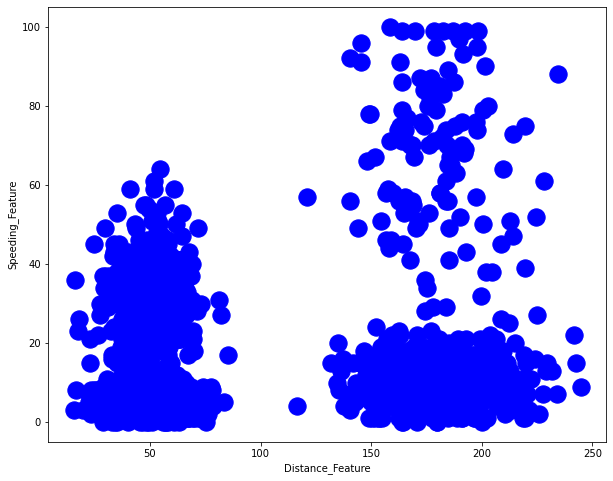

In [15]:
fig, ax=plt.subplots(figsize=(10,8))

plt.scatter(drivers_data["Distance_Feature"],
           drivers_data["Speeding_Feature"],
           s=300, c='blue')

plt.xlabel("Distance_Feature")
plt.ylabel("Speeding_Feature")

plt.show()

we can easilly see that there is logical grouping present in this data.
Now we will be doing clustering using K-means clustering algorithm. 

- We are looking for 4 cluster and will do 1000 iterations. 
- Once clustering is complete, the estimator will assign a cluster identifier to each of the data point. 

In [16]:
from sklearn.cluster import KMeans
kmeans_model= KMeans(n_clusters=4, max_iter=1000).fit(drivers_data)

/Users/mahrukhwaqar/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [17]:
kmeans_model.labels_[::40]

array([0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 1, 0, 1, 0, 0, 3, 1, 0, 0,
       0, 0, 3, 1, 0, 0, 0, 0, 3, 0, 3, 3, 1, 2, 0, 0, 0, 3, 0, 0, 1, 1,
       0, 1, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 2, 0, 0, 0,
       0, 1, 3, 0, 0, 3, 1, 0, 0, 3, 3, 1], dtype=int32)

In [18]:
#invoke unique function to see the number of unique labels.
np.unique(kmeans_model.labels_)

array([0, 1, 2, 3], dtype=int32)

In [19]:
#creating a list of tupples where we associate every data point with corresponding cluster label.
zipped_list= list(zip(np.array(drivers_data), kmeans_model.labels_))

zipped_list[1000:1010]

[(array([51.92,  7.  ]), 0),
 (array([188.49,  11.  ]), 1),
 (array([55.84,  4.  ]), 0),
 (array([59.47,  5.  ]), 0),
 (array([43.32,  4.  ]), 0),
 (array([45.9,  7. ]), 0),
 (array([48.77,  6.  ]), 0),
 (array([54.89,  4.  ]), 0),
 (array([52.15,  4.  ]), 0),
 (array([66.97, 33.  ]), 3)]

In [20]:
#4 clusters correspond to 4 centeriods.

centroids = kmeans_model.cluster_centers_
centroids

array([[ 49.98428468,   5.21441441],
       [180.34311782,  10.52011494],
       [177.83509615,  70.28846154],
       [ 50.46127059,  32.42823529]])

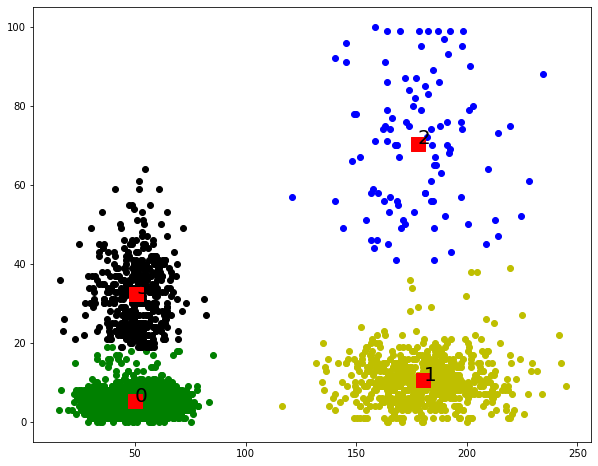

In [26]:
#visualizing the clusters 

colors = ['g', 'y', 'b', 'k']
plt.figure(figsize=(10,8))


#each data point will be in different color based on each data point it belongs to
for element in zipped_list:
    plt.scatter(element[0][0], element[0][1],
               c=colors[(element[1] % len(colors))])
    
#placing cluster centeriod in form of square mark
plt.scatter(centroids[:,0], centroids[:,1], c='r', s=200, marker='s')

#annotate each cluster center with its numeric identifier
for i in range(len(centroids)):
    plt.annotate(i, (centroids[i][0], centroids[i][1]), fontsize=20)

# Evaluating the Clustering Algorithm

In [27]:
from sklearn.metrics import silhouette_score

print("Silhouette Score: ", silhouette_score(drivers_data , kmeans_model.labels_))

Silhouette Score:  0.5911323766293182


High Silhouette Score means that model performed well. Lets run model with different number of clusters and compare the results.

## When N=3

/Users/mahrukhwaqar/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


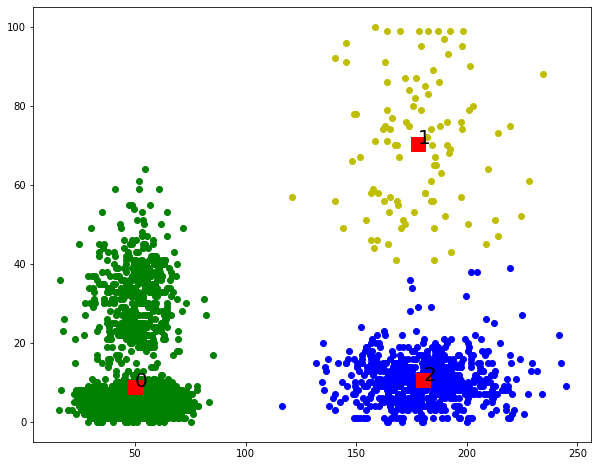

In [29]:
kmeans_model= KMeans(n_clusters=3, max_iter=1000).fit(drivers_data)
kmeans_model.labels_[::40]
np.unique(kmeans_model.labels_)

zipped_list= list(zip(np.array(drivers_data), kmeans_model.labels_))
zipped_list[1000:1010]

centroids = kmeans_model.cluster_centers_

colors = ['g', 'y', 'b', 'k']
plt.figure(figsize=(10,8))


#each data point will be in different color based on each data point it belongs to
for element in zipped_list:
    plt.scatter(element[0][0], element[0][1],
               c=colors[(element[1] % len(colors))])
    
#placing cluster centeriod in form of square mark
plt.scatter(centroids[:,0], centroids[:,1], c='r', s=200, marker='s')

#annotate each cluster center with its numeric identifier
for i in range(len(centroids)):
    plt.annotate(i, (centroids[i][0], centroids[i][1]), fontsize=20)

In [30]:
print("Silhouette Score: ", silhouette_score(drivers_data , kmeans_model.labels_))

Silhouette Score:  0.8231396834167265


Our model significantly improved, now we will try it for 2 clusters.

# N=2

/Users/mahrukhwaqar/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


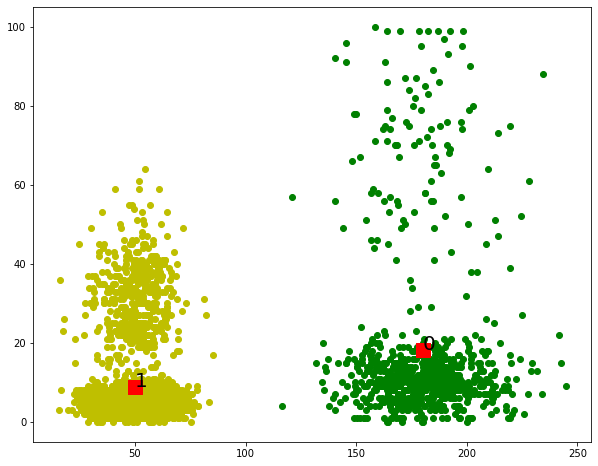

In [31]:
kmeans_model= KMeans(n_clusters=2, max_iter=1000).fit(drivers_data)
kmeans_model.labels_[::40]
np.unique(kmeans_model.labels_)

zipped_list= list(zip(np.array(drivers_data), kmeans_model.labels_))
zipped_list[1000:1010]

centroids = kmeans_model.cluster_centers_

colors = ['g', 'y', 'b', 'k']
plt.figure(figsize=(10,8))


#each data point will be in different color based on each data point it belongs to
for element in zipped_list:
    plt.scatter(element[0][0], element[0][1],
               c=colors[(element[1] % len(colors))])
    
#placing cluster centeriod in form of square mark
plt.scatter(centroids[:,0], centroids[:,1], c='r', s=200, marker='s')

#annotate each cluster center with its numeric identifier
for i in range(len(centroids)):
    plt.annotate(i, (centroids[i][0], centroids[i][1]), fontsize=20)

In [32]:
print("Silhouette Score: ", silhouette_score(drivers_data , kmeans_model.labels_))

Silhouette Score:  0.8490223286225532


We will be opting for 2 clusters for this usecase. 